**Maurice A. Santos**

**BSCS 3A - IS**

#1. Import Libraries

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('onlinefoods.csv')

print(df.head())

print(df.describe())

missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)


missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values:")
print(missing_percentage)

df_imputed = df.fillna(df.mean())

print("\nImputed DataFrame:")
print(df_imputed.head())

print("\nImputed DataFrame Statistics:")
print(df_imputed.describe())

In [16]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies['var'] = df['Feedback'].apply(lambda var: 1 if var == 'Positive' else 0).astype(int)

In [17]:
X = df_dummies.drop(["var", "Feedback_Positive"], axis = 1)
y = df_dummies["var"]

In [ ]:
numeric_cols = df[['Age', 'Family size', 'Pin code', 'latitude', 'longitude']]
numerical_stats = numeric_cols.describe()

print(numerical_stats)

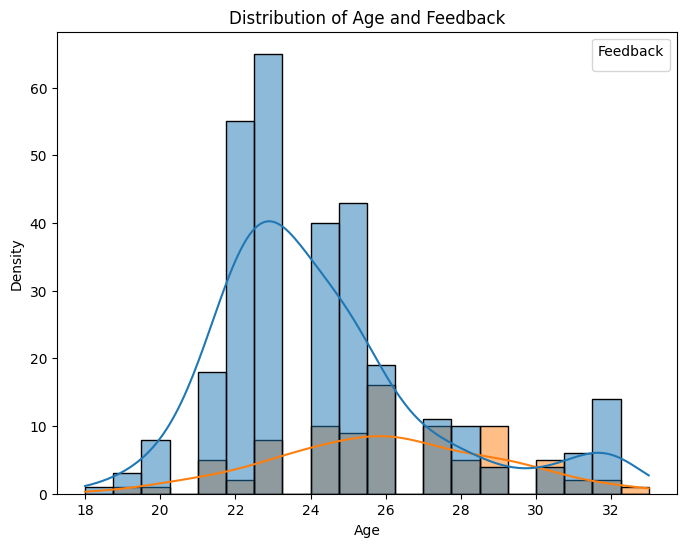

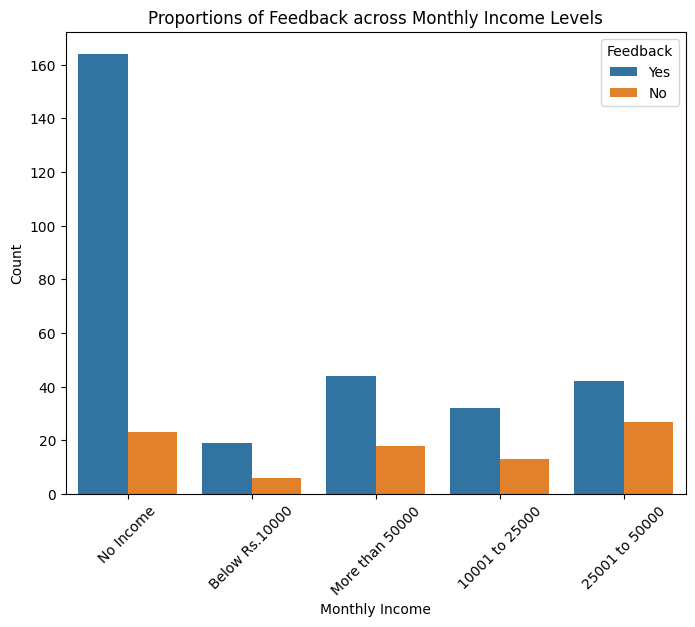

<ipython-input-19-cd5af4847c15>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


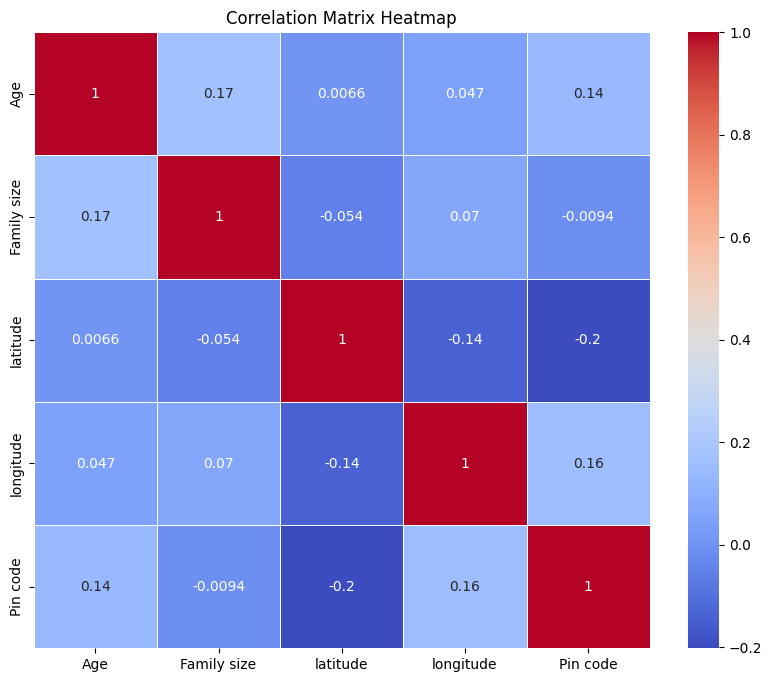

In [19]:

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Output', kde=True, bins=20)
plt.title('Distribution of Age and Feedback')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Feedback')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Monthly Income', hue='Output')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()

# Heatmap
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

report = f"""
Accuracy: {accuracy}

Confusion Matrix:
{conf_matrix}

Classification Report:
{class_report}
"""

print(report)


Accuracy: 0.8717948717948718

Confusion Matrix:
[[ 6  5]
 [ 5 62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.93      0.93      0.93        67

    accuracy                           0.87        78
   macro avg       0.74      0.74      0.74        78
weighted avg       0.87      0.87      0.87        78




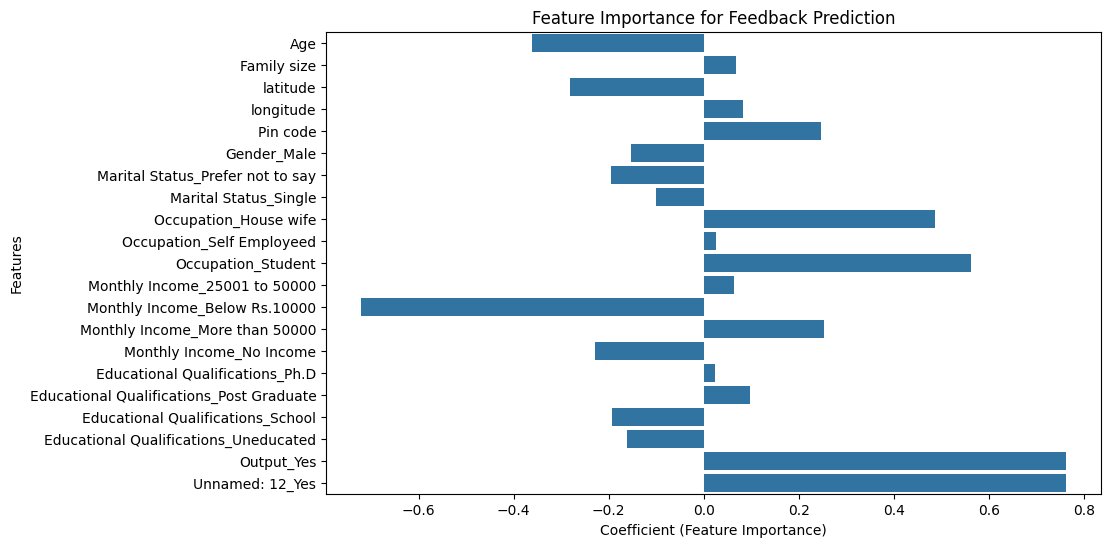

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      1.00      0.92        67

    accuracy                           0.86        78
   macro avg       0.43      0.50      0.46        78
weighted avg       0.74      0.86      0.79        78



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [22]:
feature_importance = model.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Coefficient (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance for Feedback Prediction")
plt.show()

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

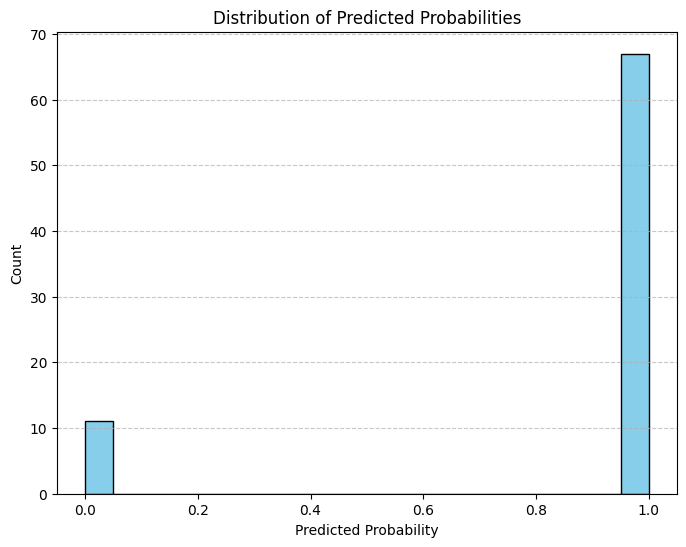

In [23]:
y_pred = model.predict(X_test_scaled)

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()